<a href="https://colab.research.google.com/github/noraleilaa/PersonalProjects/blob/main/StockPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment_9 Bonus
This week, you will download 5 years of daily adjusted closing prices for the Standard & Poor’s 500 index from finance.yahoo.com. You will build RNN models with the first 80% of the data and forecast the last 20%. It is important that you split the data in such a way that the withhold set is the last portion of the dataset.

Requirements

-- Conduct your analysis using the specified 80 / 20 split.

-- Conduct EDA.

-- Build at least three RNN models based on hyperparameter tuning.

-- Evaluate goodness of fit metrics.

-- Discuss your model’s performance.

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Read the train and test data
from google.colab import files
uploaded = files.upload()


sandp = pd.read_csv('^SPX.csv')

Mounted at /content/drive


Saving ^SPX.csv to ^SPX.csv


In [2]:
sandp["Date"] = pd.to_datetime(sandp["Date"])
sandp["Timestamp"] = sandp["Date"].apply(lambda x: x.timestamp())


sandp.drop(columns=["Date"], inplace=True)


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = sandp.drop(columns=['Volume'])  # Features
y = sandp['Volume']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 1200 to 1126
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Timestamp  1006 non-null   float64
dtypes: float64(6)
memory usage: 55.0 KB


In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 561 to 834
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Timestamp  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


          Open         High          Low        Close    Adj Close  \
0  2861.510010  2873.229980  2861.320068  2862.959961  2862.959961   
1  2860.989990  2867.540039  2856.050049  2861.820068  2861.820068   
2  2860.290039  2868.780029  2854.030029  2856.979980  2856.979980   
3  2862.350098  2876.159912  2862.350098  2874.689941  2874.689941   
4  2884.689941  2898.250000  2884.689941  2896.739990  2896.739990   

       Volume     Timestamp  
0  3174010000  1.534810e+09  
1  2701250000  1.534896e+09  
2  2724450000  1.534982e+09  
3  2603010000  1.535069e+09  
4  2865070000  1.535328e+09  


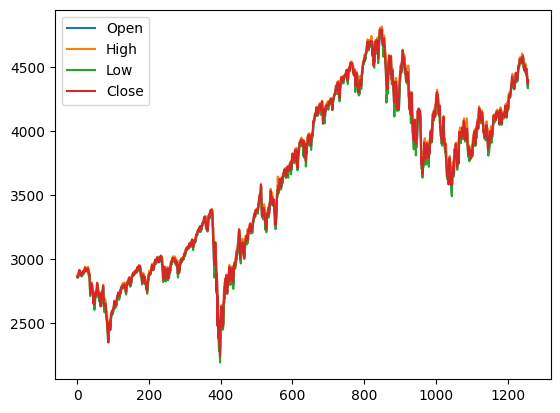

In [7]:
print(sandp.head())

columns_to_plot = ['Open', 'High', 'Low', 'Close']

for column in columns_to_plot:
    sandp[column].plot(label=column)

plt.legend()
plt.show()

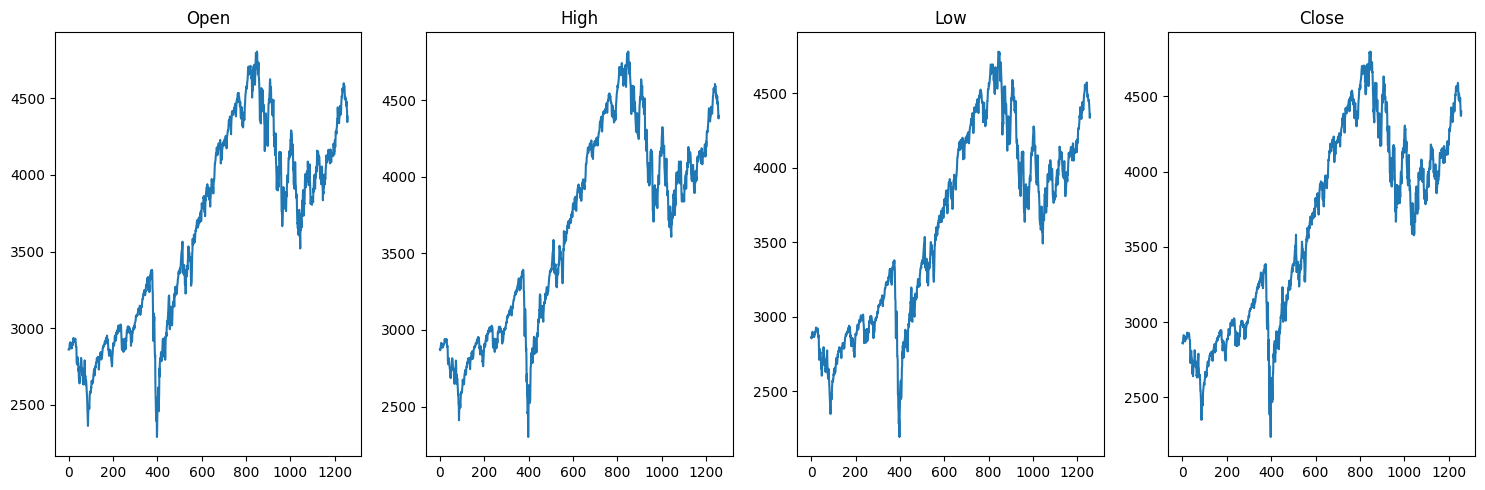

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    sandp[column].plot(ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [9]:
float_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
X_train[float_columns] = X_train[float_columns].astype(np.float32)


In [10]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1006, 6)
X_test shape: (252, 6)


# Method 1-- Sequential (Classic)

In [11]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

1006/1006 [==============================] - 17s 13ms/step - loss: 19900124722792235008.0000


In [12]:
predictions = model.predict(X_train)

predictions_df = pd.DataFrame(predictions)
predictions_df.to_csv('Assignment_9_predictions.csv')

32/32 [==============================] - 2s 10ms/step


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X_train)


predictions_reshaped = np.zeros((252, 6))

# Now you can use predictions_reshaped for inverse transformation
predicted_stock_price = sc.inverse_transform(predictions_reshaped)

In [17]:
predicted_stock_price_df = pd.DataFrame(predicted_stock_price)

# Display the first few rows of the DataFr
predicted_stock_price_df.head()

,0,1,2,3,4,5
0,2344.439941,2449.709961,2280.52002,2304.919922,2304.919922,1.534810e+09
1,2344.439941,2449.709961,2280.52002,2304.919922,2304.919922,1.534810e+09
2,2344.439941,2449.709961,2280.52002,2304.919922,2304.919922,1.534810e+09
3,2344.439941,2449.709961,2280.52002,2304.919922,2304.919922,1.534810e+09
4,2344.439941,2449.709961,2280.52002,2304.919922,2304.919922,1.534810e+09


# Method 2-- LSTM Gated Recurrent Unit



In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(10,return_sequences=True, input_shape= (X_train.shape[1], 1)))
model_gru.add(Dense(1))

# Compile the GRU model
model_gru.compile(optimizer='adam', loss='mse')

# Train the GRU model on the data
model_gru.fit(X_train, y_train, batch_size=1, epochs=2)

print("\nGRU Model Summary:")
model_gru.summary()


Epoch 1/2
1006/1006 [==============================] - 6s 4ms/step - loss: 19900124722792235008.0000
Epoch 2/2
1006/1006 [==============================] - 5s 5ms/step - loss: 19900135717908512768.0000

GRU Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 6, 10)             390       
                                                                 
 dense_2 (Dense)             (None, 6, 1)              11        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
predictions_gru = model_gru.predict(X_test)

predictions_gru_re = predictions_gru.reshape(-1, 1)
predictions_df_gru = pd.DataFrame(predictions_gru_re)

predictions_df_gru.to_csv('Assignment_9_predictions_gru.csv', index=False)

8/8 [==============================] - 1s 4ms/step


# Method 3-- LSTM with attention


In [28]:
from tensorflow.keras.layers import Layer, LSTM

class MultiplicativeLSTM(Layer):
    def __init__(self, units, **kwargs):
        super(MultiplicativeLSTM, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.lstm = LSTM(self.units, return_sequences=True, return_state=True)
        super(MultiplicativeLSTM, self).build(input_shape)

    def call(self, inputs):
        input, initial_state = inputs
        lstm_output, state_h, state_c = self.lstm(input, initial_state=initial_state)

        # Element-wise multiplication between the input and LSTM output
        multiplicative_output = input * lstm_output

        return multiplicative_output, [state_h, state_c]

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], self.units)


In [21]:
X_train.shape

(1006, 6)

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, LSTM, Input, Multiply
from tensorflow.keras.models import Model

class MultiplicativeLSTM(Layer):
    def __init__(self, units, **kwargs):
        super(MultiplicativeLSTM, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.lstm = LSTM(self.units, return_sequences=True, return_state=True)
        super(MultiplicativeLSTM, self).build(input_shape)

    def call(self, inputs):
        input_seq, initial_state = inputs
        lstm_output, state_h, state_c = self.lstm(input_seq, initial_state=initial_state)

        # Implement the multiplicative interaction (element-wise multiplication)
        multiplicative_output = Multiply()([input_seq, lstm_output])

        return multiplicative_output, [state_h, state_c]

    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], input_shape[0][1], self.units)


In [23]:
input_seq_length = 1006  # Length of your input sequence
input_dim = 6  # Dimensionality of input data (per time step)
hidden_units = 6 # Number of LSTM units

# Define input tensors with the correct shape
input_seq = Input(shape=(input_seq_length, input_dim))
initial_state = [Input(shape=(hidden_units,)), Input(shape=(hidden_units,))]

# Create a Multiplicative LSTM layer
multiplicative_lstm = MultiplicativeLSTM(hidden_units)([input_seq, initial_state])

# Create a model
model_attention = Model(inputs=[input_seq, initial_state], outputs=multiplicative_lstm)

# Compile the model and train it as needed
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
print("\nModel with Attention Summary:")
model_attention.summary()


Model with Attention Summary:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1006, 6)]            0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 multiplicative_lstm (Multi  ((None, 1006, 6),            312       ['input_1[0][0]',             
 plicativeLSTM)               [(None, 6),                      

In [25]:
X_test.shape

(252, 6)